# Advanced EDA on Ames housing prices prediction <br/>
by Moaz Magdy

----------

> **“Numbers have an important story to tell. They rely on you to give them a voice.”** -- Stephen Few


During my journey to learn data science, I came across many interesting MOOCs, tutorials, blogs, and books that helped me develop an understanding of the data science methodology.
One of those great books is  <a href="https://amzn.to/2EqvUy7" target="_blank">"Think Like a Data Scientist: Tackle the data science process step-by-step"</a> by Brian Godsey. This book is process-oriented: it introduces the data science work flow in an abstract way without delving into technical details of neither statistics nor programming. This helped me to focus on the big picture of the data science project without getting lost in the technical details of statistic, machine learning and coding.

<p> Godsey divided the data science process into three phases: preparing, building and finishing. Each phase consists of subprocesses.

**Data Science project phases and subprocesses:<br/>**

  + _Phase 1: Prepare<br/>_
      - Set goals.<br/>
      - Explore.<br/>
      - Wrangle.<br/>
      - Assess.<br/>
  + _Phase 2: Build<br/>_
      - Plan<br/>
      - Analyze<br/>
      - Engineer<br/>
      - Optimize<br/>
      - Execute<br/>
  + _Phase 3: Finish<br/>_
      - Deliver<br/>
      - Revise<br/>
      - Wrap up

We will try to follow this road map, as far as we can, to work on this project of Ames houses prices prediction. This notebook will cover the first phase (Prepare) and the remaining two phases (Build and Finish) will be covered in subsequent notebooks.

As illustrated by below Venn diagram, one key component of data science is *domain expertise*. So, it would very helpful if you familiarize yourself with basic real estate terms and concepts. During my research, I found some useful resources: <br/>
1) <a href="https://www.proptiger.com/guide/real-estate-glossary/a">Real estate glossary</a>. <br/>
2) <a href="http://www.cityofames.org/home/showdocument?id=35641">Ames' rules of construction and definitions</a>. <br/>
3) <a href="http://www.cityofames.org/home/showdocument?id=648">Ames' developement standards</a>. <br/> 
4) <a href="https://www.planning.org/pas/reports/report165.htm">Illustrating the Zoning Ordinance</a>. <br/>


<img src="http://social-metrics.org/wp-content/uploads/2018/10/venn.png" style= height:300px alt="alt text" title="Data Science Venn Diagram" />

# 1. Prepare

In this phase, we will identify what we know? What we have? What we can get? Where we are? and where we would like to go?<br/>
The first and most important step is to set goals for our project.

## 1.1 Set goals:
While setting goals for a data science project consider the following points:
+ Listen to the customer:
 - What questions need to be answered?
   * What are the factors that strongly influence the final house price? and describe their relationship.
 - What is the tangible final product?
   * A machine learning model to predict the house price based on input features.

+ Summaries of prior research and similar projects.
     * <a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#2.-First-things-first:-analysing-'SalePrice'">Pedro Marcelino's kernel on Kaggle</a>:<br/>
       * Created three segments of the 79 explanatory variables (Building, Space,and Location).
       * Stated prior expectations (e.g. high, medium, low) about the importance of each variable by asking questions from the view point of a potential customer.
       * Used scatter plots and box plots to study the relation ship between variables with high expectation and the sales price.
       * Used heat maps and correlation matrix to further discover more variables that might be correlated with the sales price.
       * Checked variables with missing data and excluded variables with more than 15% missing.
       * Standardized the sales price to detect unusual observation points, then used scatter plots to further investigate those suspected outliers.
       * Tested the assumptions of multivariate analysis (i.e. normality, heteroscedasticity, linearity, and absence of correlated errors).
       * Most important variables : ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

+ Ask good questions based on concrete assumptions that are well defined and can be tested.<br/>
 **Example questions:**
 - Q1. Is the type of foundation strongly correlated with the sale price?
 - Q2. Are the houses located in a commercial area more expensive than houses other in locations?
 - Q3. What's the relationship between exterior covering on house and the overall quality of the house?
 - Q4. Is the type of dwelling strongly related to the general zoning classification (e.g. Agricultural, industrial ... etc.)?
 - Q5. Is proximity to a arterial street strongly strongly correlated with the final price of the house?
 - Q6. Is proximity to more than one condition (e.g. arterial street, feeder street ... etc.) strongly related to sales price?
 - Q7. What's the relationship between the dwelling type and the confronting area? Are houses with larger confronting area more expensive than those with smaller confronting area?
 - Q8. Is there one type of dwelling that's generally more expensive than others?


+ Is the data relevant and sufficient?

<p> The available data includes almost every aspect of a housing, the location, available facilities, quality of interior and exterior, materials used on the interior and exterior, space related characteristics and many other characteristics. So the data we have is relevant.</p>
<p>The training data includes 1460 record which is sufficiently large compared to the 79 feature we have. As a rule of thumb, the training data should be at least one order of magnitude more than trainable parameters.</p>

Now we can state the **goal of the project as follows:**
**<p>"to build a machine learning regression model to accurately predict the final price of each home given its characteristics".<p/>**

*Note*: I found it useful to use these forms (<a href= 'https://developers.google.com/machine-learning/problem-framing/try-it/framing-exercise'>Form 1</a>, <a href='https://developers.google.com/machine-learning/problem-framing/try-it/formulate-exercise'>Form 2</a>) developed by Google in order to frame a machine learning problem.

## 1.2 Explore

Data scientist as explorer should access interesting areas, recognize patterns and find new interesting things. Also, a data scientist should evaluate new and unfamiliar things, and draw connections between the familiar and unfamiliar things.<br/>
Data scientist should make use of **the data science method:**
+ Ask a question.
+ State a hypothesis about the answer to the question.
+ Make a testable prediction that would provide an evidence in favor of the hypothesis if it's correct.
+ Test the prediction via an experiment involving data.
+ Draw the appropriate conclusions through analyses of the experimental results.<br/>


We will follow this data science method to investigate the questions we stated in the previous section.<br/>
But we will first start by checking the features we have, and the data types of these features.

In [1]:
# Importing libraries we will use.
import warnings
import numpy as np
import pandas as pd

import scipy.stats as stat
import scikit_posthocs as sp
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as sci

from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns

# Limiting floats output to 2 decimal points and adding the thousands operator that places a comma between all thousands
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Ignoring warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# set style and color palette we will use for Seaborn visualization package
sns.set(style="ticks", palette="bright")

In [2]:
labelled = pd.read_csv('train.csv') #labelled data is the provided training data.
unlabelled = pd.read_csv('test.csv') #unlabelled data is the test data.

In [3]:
#Concate both sets for the sake of data exploration and wrangling
data = pd.concat([labelled, unlabelled], axis = 0, ignore_index = True)

**Features exploration**<br/>


In [4]:
data.shape

(2919, 81)

We have 79 explanatory features. 1 feature for the house ID and 1 response variable. <br/>Next, check the data types of features and capture them in separate variables so we can access them easily later. This is useful because when use the *describe* method later, the output will be much helpful.

In [5]:
categorical = data.dtypes[data.dtypes == 'object'].index.tolist()
numerical = data.dtypes[data.dtypes != 'object'].index.drop(['Id','SalePrice']).tolist()

In [6]:
print('Categorical variables are:\n\n', categorical,'\n\nNumerical variables are:\n\n',numerical)

Categorical variables are:

 ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'] 

Numerical variables are:

 ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'O

In [7]:
print('No. of categorical variables:', len(categorical), ' ,  No. of numerical variables:', len(numerical))

No. of categorical variables: 43  ,  No. of numerical variables: 36


So, we have 43 categorical features and 36 numerical features. The methods of graphical and quantitative analysis differs for both types.

**Categorical features at first glance**<br/>


Let's have a look on the categorical features we have; number of categories in each, and the most frequent category.

In [8]:
data[categorical].describe().transpose()

,count,unique,top,freq
Alley,198,2,Grvl,120
BldgType,2919,5,1Fam,2425
BsmtCond,2837,4,TA,2606
BsmtExposure,2837,4,No,1904
BsmtFinType1,2840,6,Unf,851
BsmtFinType2,2839,6,Unf,2493
BsmtQual,2838,4,TA,1283
CentralAir,2919,2,Y,2723
Condition1,2919,9,Norm,2511
Condition2,2919,8,Norm,2889


The data frame above shows that some features (e.g. **"Neighborhood"**) have as much as 25 category! This may not be useful and we may consider grouping similar categories together so that we end up with smaller number of categories that are significantly different from each other. Here, we mean by similar is that the sale price doesn't vary significantly between categories. We will use the box plots and statistical significance tests later to do this.<br/>

We can also notice some features (e.g. **"Utilities"**) have a very prominent category: *AllPub* is repeated 1459 out of 1460! In this case, we don't expect this feature to have any explanatory power since it have almost one category. This feature and similar features (i.e. **"Street"**, **"RoofMatl"**, **"Heating"**, **"GarageQual"**, and **"GarageCond"**) are good candidates for feature engineering: some of them can be combined in one feature that has more explanatory power for example.<br/>

Other features have relatively small number of not-null values (e.g. **"Alley"**, **"FireplaceQu"**, **"PoolQC"**, **"Fence"**, and **"MiscFeature"**). These features would be better converted to binary features with only two categories rather than multiple categories with rare occurrences.

**Numerical Features at first glance**<br/>
<p>Let's have another look on the numerical features we have; try to make sense of the shape of distribution by comparing the mean and median for each feature, and the range of values each feature has.<p/>

In [9]:
data[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,"2,919.00","1,159.58",392.36,334.00,876.00,"1,082.00","1,387.50","5,095.00"
2ndFlrSF,"2,919.00",336.48,428.70,0.00,0.00,0.00,704.00,"2,065.00"
3SsnPorch,"2,919.00",2.60,25.19,0.00,0.00,0.00,0.00,508.00
BedroomAbvGr,"2,919.00",2.86,0.82,0.00,2.00,3.00,3.00,8.00
BsmtFinSF1,"2,918.00",441.42,455.61,0.00,0.00,368.50,733.00,"5,644.00"
BsmtFinSF2,"2,918.00",49.58,169.21,0.00,0.00,0.00,0.00,"1,526.00"
BsmtFullBath,"2,917.00",0.43,0.52,0.00,0.00,0.00,1.00,3.00
BsmtHalfBath,"2,917.00",0.06,0.25,0.00,0.00,0.00,0.00,2.00
BsmtUnfSF,"2,918.00",560.77,439.54,0.00,220.00,467.00,805.50,"2,336.00"
EnclosedPorch,"2,919.00",23.10,64.24,0.00,0.00,0.00,0.00,"1,012.00"


From the above data frame, we can notice features whose maximum value is less than or equal 10 (e.g. **"OverallQual"**, **"OverallCond"**, **"BsmtFullBath"**, **"BsmtHalfBath"**) while other features may have a maximum value of tens of thousands (e.g. **"LotArea"**). This large difference in scales between features can negatively affect any prediction model we build later, so we should consider standardization or normalization first. <br/>


Features describing different porch areas (**"OpenPorchSF"**, **"EnclosedPorch"**, **"3SsnPorch"**, **"ScreenPorch"**) and pool area (**"PoolArea"**) have a third quartile of Zero which means that at least 75% of houses in the dataset don't have neither porch nor pool. So, these features are better combined into fewer number of features or converted into binary features or even discarded at all.

**"MiscVal"** feature also has a third quartile of zero, which makes sense because most houses don't have **"MiscFeature"**. But we can't discard this feature before checking the correlation with the **"SalePrice"** because it indicates that some houses have **"MiscFeature"** that worth as much as $15,500.

Also, there are four features (**"YearBuilt"** , **"YearRemodAdd"** , **"GarageYrBlt"** , **"YrSold"** ) which are actually dates not numeric values. So, we should be careful while handling these features.

## 1.3 Data Wrangling

<p> Data wrangling or data munging is the process of collecting data and information in difficult, unstructured formats and converting it into something that's suitable for software usage.</p>

It consists mainly of two steps:<br/>

 1)  Additional data collection which may include one or more of the following:
   - Data hunting (APIs, government data sources, academic datasets, and manual data collection).
   - Scraping.
   - Logging.
   
   
 2)  Data cleaning which includes:
   - Correcting errors: which are made by mistake during raw data collection and primary processing.
   - Data compatibility assurance: this refers to data comparability issues that arise when datasets are merged (e.g. units of measurement, numerical representations, spelling of names, data and time formats, and currency).
   - Dealing with missing data by different imputation techniques (e.g. heuristic based techniques, mean/median value, most frequent value, interpolation, and nearest neighbor).
   - Outliers detection.

### 1.3.1 Data collection

<p>Fortunately, we can find more real state related data for the City of Ames, Iowa in the <a href="https://www.cityofames.org/home">official website</a>. This includes maps and different types of reports. But, we think we have all data needed to start building our sale price prediction model. We may make use of the additional data available online in later projects which may include geographical visualizations.</p>

### 1.3.2 Data cleaning

Now, it's time for the second step. Let's go directly to **data cleaning:**

> CAUTION: Make a copy of the original data before applying any changes during this step and subsequent steps.

In [10]:
data_org = data.copy()

#### 1.3.2.1 Correcting errors

<p>The first step to detect errors is to make an expectation about distribution of the variable of interest, how should it look like? For example, if we think of distribution of annual income for individuals around the world, we would expect the distribution to be right skewed and heavy tailed: since very rich people are much less than very poor people. On the contrary, if we think of the distribution of death age, we would expect the distribution to be left skewed.</p>

We'll start with the **"SalePrice"** variable. I expect its distribution to be right skewed because it seems, at least to me, there's no upper limit on how luxurious a house could be but of course there's a lower limit. We will use both graphical methods (e.g. box plot and histogram) and quantitative measures (e.g. coefficient of skewness and kurtosis) to assess the modality, symmetry and spread of sale price distribution.<br/> 

Errors can appear as something that's unexpected or unusual such as a bimodal distribution or an unusual max/min values. 

In [11]:
#Function for formating y-label to $(amount)k or $(amount)M
def currency(x,pos):
    if x >= 10**6 :
        return '${:1.2f}M'.format(x*1e-6)
    return '${:1.0f}k'.format(x*1e-3)

[Text(0.5, 0, '')]

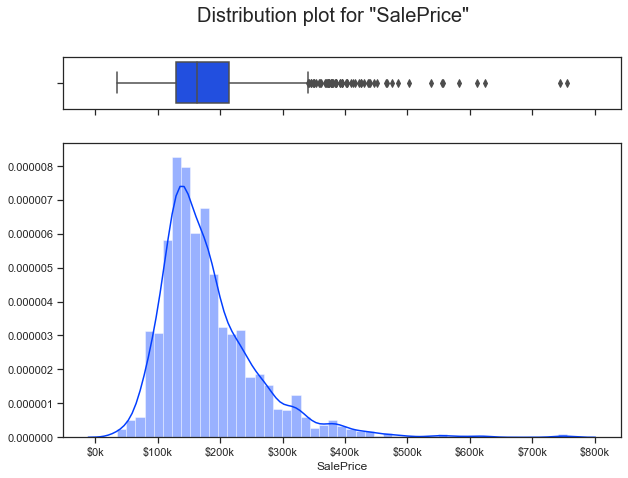

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    figsize=(10,7), gridspec_kw={"height_ratios": (.15, .85)})
plt.suptitle('Distribution plot for "SalePrice"', fontsize = 20)
formater = tck.FuncFormatter(currency)
ax_hist.xaxis.set_major_formatter(formater)
sns.boxplot(data['SalePrice'].dropna(), ax= ax_box)
sns.distplot(data['SalePrice'].dropna(), ax= ax_hist)
ax_box.set(xlabel='')

In [13]:
print('"SalePrice" kurosis = ', np.round(data['SalePrice'].kurtosis(),2),
     '\n"SalePrice" skewness = ', np.round(data['SalePrice'].skew(),2)), 
data['SalePrice'].describe()

"SalePrice" kurosis =  6.54 
"SalePrice" skewness =  1.88


count     1,460.00
mean    180,921.20
std      79,442.50
min      34,900.00
25%     129,975.00
50%     163,000.00
75%     214,000.00
max     755,000.00
Name: SalePrice, dtype: float64

The probability distribution of the sale price (response variable) is unimodal, right-skewed (having skewness coefficient of 1.88 while skewness of normal distribution is zero), and heavy-tailed (having kurtosis of 6.54 while kurtosis of normal distribution is zero). Heavy-tailed distributions tend to have outliers. It seems there's nothing unexpected: the distribution is right skewed as we expected and the max/min values are not unusual. So, we can conclude there's no errors to be corrected for this variable.

We should also check the other variables for potential errors. The continuous numeric variables are best described by distplots while discrete numeric variables and categorical variables are best described by countplots. *But be aware of some variables which are actually continuous having an integer data type rather than float (e.g. **GrLivArea**, **GarageArea**, **WoodDeckSF**).*

In [14]:
#List of varaibles having 'int64' type and we want to  make distplots for them rather than countplots.
int_as_float = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal',"YearBuilt", "YearRemodAdd"]

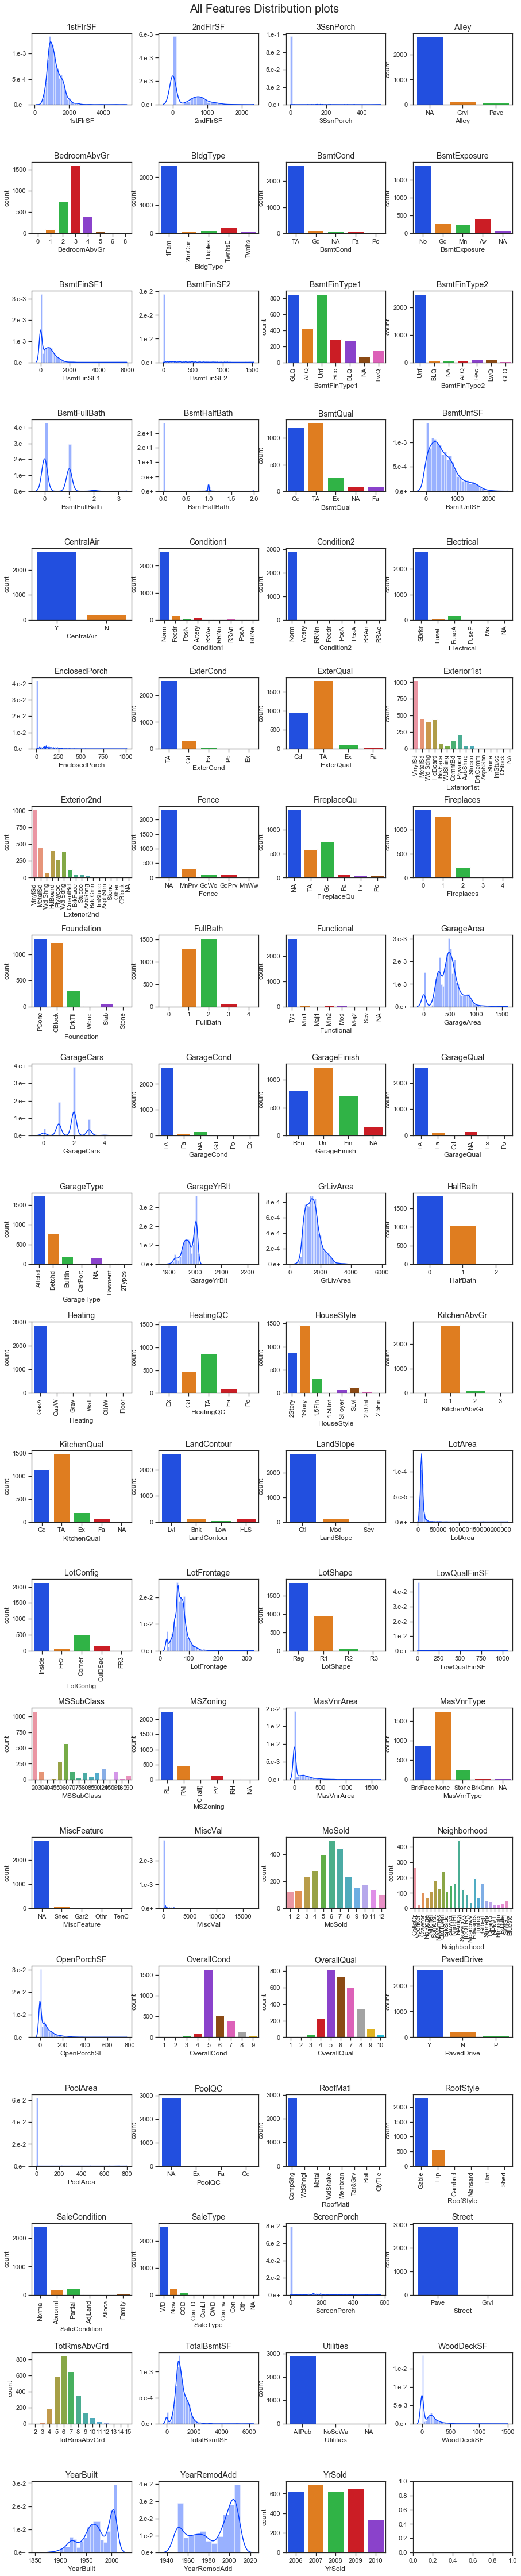

In [15]:
allcolumns = np.array(data.columns.drop(['Id','SalePrice']).tolist()+[None]).reshape(20, 4)
fig, ax = plt.subplots(figsize=(15, 70), ncols=4, nrows=20)
fig.suptitle('All Features Distribution plots', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.97,
    wspace=0.275,
    hspace= 0.8)

prob_formater = tck.FuncFormatter(
    lambda x, p: np.format_float_scientific(x, precision=0, exp_digits=0))

for i in range(20):
    for j in range(4):
        if i == 19 and j == 3:
            continue
        ax[i][j].set_title(allcolumns[i][j], fontsize=14)
        for tick in ax[i][j].get_xticklabels():
            if data[allcolumns[i][j]].nunique() >= 5 and data[allcolumns[i][j]].dtype == 'object':
                tick.set_rotation(90)
        if (data[allcolumns[i][j]].dtypes == 'float64') | (allcolumns[i][j] in int_as_float):
            ax[i][j].yaxis.set_major_formatter(prob_formater)
            sns.distplot(data[allcolumns[i][j]].dropna(), ax=ax[i, j], kde=True)
        else:
            sns.countplot(data[allcolumns[i][j]].fillna('NA'), ax=ax[i, j])

One can notice many features have bimodal distribution (e.g. **"BsmtFinSF1"**, and **"WoodDeckSF"**) and the first peak is almost at the value of zero. This is because a zero is used rather than NA to represent the absence of this feature. For example, **"2ndFlrSF"** (Second floor square feet), which is a continuous variable by nature, has two peaks one at zero (which corresponds to no 2nd floor) and the other is around 800. Here, an NA should be used rather than zero. So, we will exclude all zeros from our distplots.

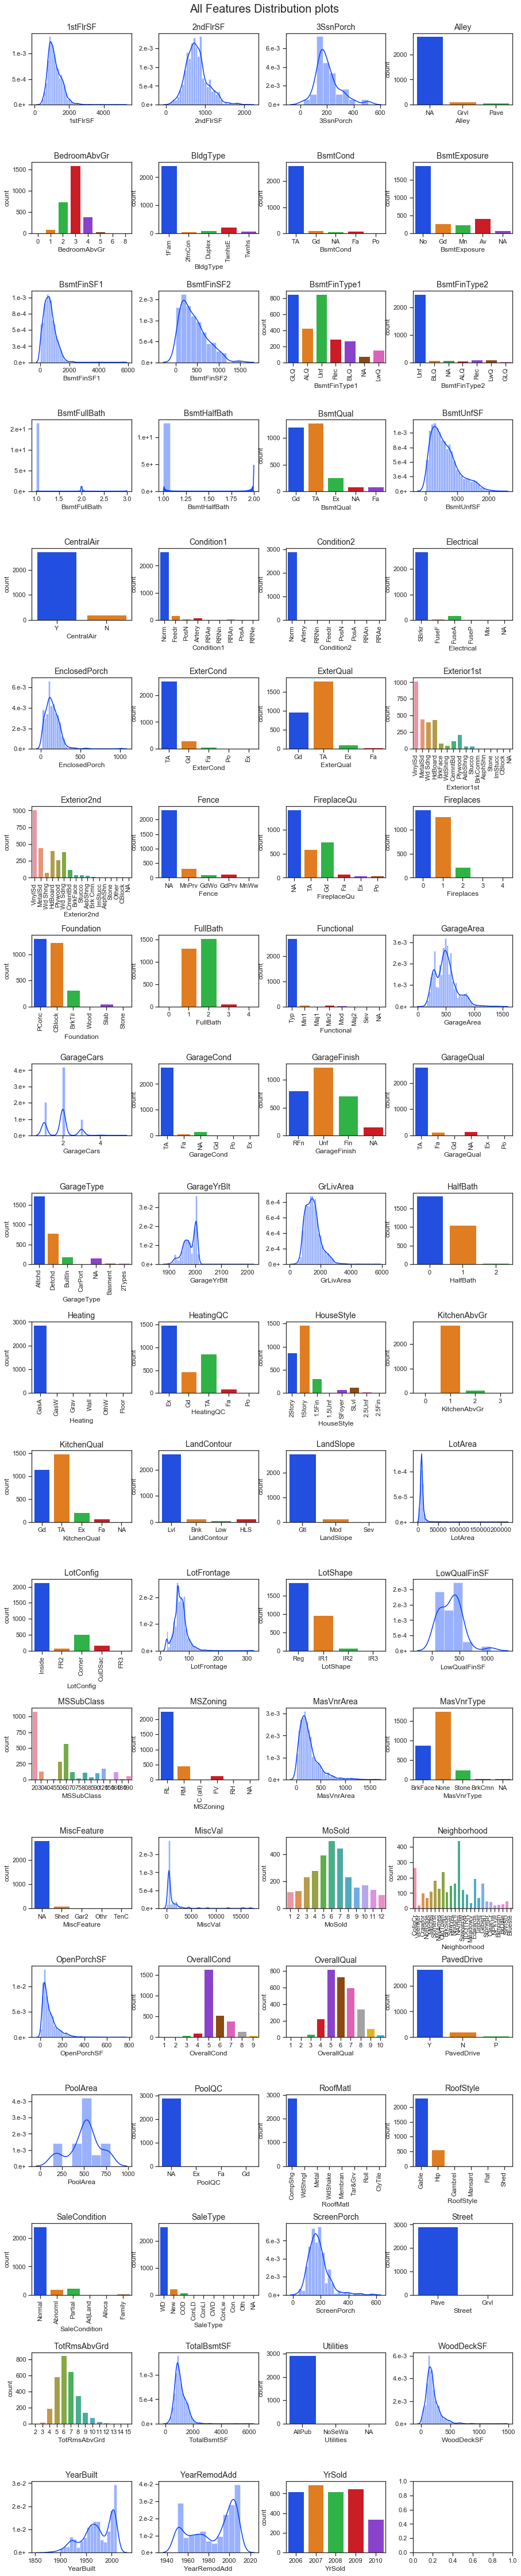

In [16]:
fig, ax = plt.subplots(figsize=(15, 70), ncols=4, nrows=20)
fig.suptitle('All Features Distribution plots', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.97,
    wspace=0.275,
    hspace= 0.8)

prob_formater = tck.FuncFormatter(
    lambda x, p: np.format_float_scientific(x, precision=0, exp_digits=0))

for i in range(20):
    for j in range(4):
        if i == 19 and j == 3:
            continue
        ax[i][j].set_title(allcolumns[i][j], fontsize=14)
        for tick in ax[i][j].get_xticklabels():
            if data[allcolumns[i][j]].nunique() >= 5 and data[allcolumns[i][j]].dtype == 'object':
                tick.set_rotation(90)
        if (data[allcolumns[i][j]].dtypes == 'float64') | (allcolumns[i][j] in int_as_float):
            ax[i][j].yaxis.set_major_formatter(prob_formater)
            sns.distplot(data.loc[(data[allcolumns[i][j]].isna() == False) & (data[allcolumns[i][j]] != 0),
                                      allcolumns[i][j]], ax=ax[i, j], kde=True)
        else:
            sns.countplot(data[allcolumns[i][j]].fillna('NA'), ax=ax[i, j])

Now, we can see that features like **"BsmtFinSF1"**, **"WoodDeckSF"**, and **"2ndFlrSF"** have only one peak after excluding the zeros.<br/>
But, the **"YearRemodAdd"** feature (Remodel date) is bimodal. By referring to data description file, we can find this feature was set to be equal to **"YearBuilt"** if there's no remodeling or additions. We suggest setting **"YearRemodAdd"** to NA, temporarily, rather than the **"YearBuilt"** and plot the displot again to check if two peaks still exist.

In [17]:
data.loc[data.YearBuilt == data.YearRemodAdd, 'YearRemodAdd'].count()

1560

So, there are 1560 house that have never been remodeled and their **YearRemodAdd** will be set to NA.

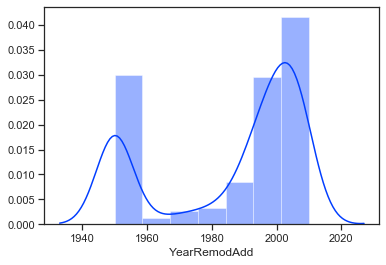

In [18]:
data.loc[data.YearBuilt == data.YearRemodAdd, 'YearRemodAdd'] = np.nan
sns.distplot(data['YearRemodAdd'].dropna(), kde= True)

Now, it's clear that the distribution peak is around 2000 and there's something unusual before 1960. Let's compare the distributions of **YearBuilt** and **YearRemodAdd** and try to figure out what's wrong. Initially, we expect **YearRemodAdd** distribution to lag **YearBuilt** distribution and to have almost the same shape.

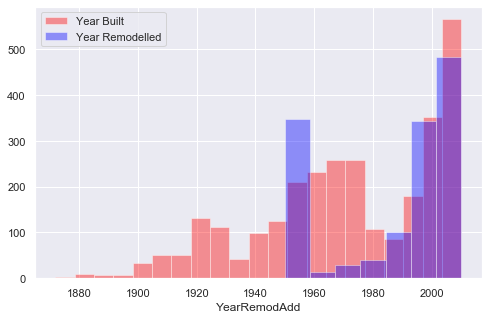

In [19]:
#Plotting the two distributions on the same axis.
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot( data['YearBuilt'].dropna() , color="red", label="Year Built",  kde= False, )
sns.distplot( data['YearRemodAdd'].dropna() , color="blue", label="Year Remodelled", kde= False)
plt.legend()

In [20]:
#The houses remodeled before 1960
data.loc[data.YearRemodAdd < 1960]['YearRemodAdd'].value_counts()

1,950.00    339
1,958.00      4
1,955.00      2
1,959.00      1
1,954.00      1
1,953.00      1
1,952.00      1
Name: YearRemodAdd, dtype: int64

By checking the **"YearRemodAdd"** feature we note the minimum value is 1950. And no prior records are available. Also, there are 339 houses that are supposed to be remodeled in 1950 alone while there's no single house remodeled in the next year. Since we don't have more information about how was this data collected? We suspect that the process of keeping records for remodeling date started only in 1950 and all houses that have ever remodeled at that time are assumed to be remodeled in 1950.

We have two options to deal with this issue:<br/>
1st: Estimate the true **"YearRemodAdd"** for houses with **"YearRemodAdd"** = 1950.<br/>
2nd: to replace the **"YearRemodAdd"** = 1950 by NA.

Let's try both options and check which is better.

*1st option:* YearRemodAdd estimation


Our estimation will be based on the mid difference between **YearBuilt** and 1950 for each **Neighborhood**. We will add this mid difference to **YearBuilt** such that:<br/>

Estimated **YearRemodAdd**  =  **YearBuilt**  +  (1950 - **YearBuilt**)/2

This is because our assumption about the true **YearRemodAdd** implies the following constraints:<br/>
1- **YearRemodAdd** should be smaller than 1950<br/>
2- **YearRemodAdd** should be larger than **YearBuilt** <br/>

So, we can't use a summary statistic such as: mean or median in our estimation because we will end up violating one of these two constraints.

In [21]:
#Calculating the difference between 1950 and 'YearBuilt'
data['difference'] = data.loc[data.YearRemodAdd == 1950, 'YearBuilt'].apply(lambda x: 1950 - x)

In [22]:
# Houses whose remodeling date will be changed
# We want to keep record of the original data in the sack of checking our work later
YearRem_bfr_change = data.loc[data.YearRemodAdd== 1950, [
    'Id', 'YearRemodAdd', 'YearBuilt']].rename(columns = {'YearRemodAdd':'YearRemodAdd_bfr'})

FrstOpt_YearRemodAdd = pd.DataFrame(data.YearRemodAdd)

# Assigning estimated 'YearRemodAdd' to houses with YearRemodAdd == 1950 and keep the new values in a separate df
FrstOpt_YearRemodAdd.loc[data.YearRemodAdd== 1950,'YearRemodAdd'] = data.loc[data.YearRemodAdd== 1950, [
    'YearBuilt', 'difference']].apply(lambda x: np.ceil(x[0] + 0.5*x[1]), axis=1)

#A comparison between the "YearBuilt" and modified "YearRemodAdd" to check if our constraints aren't violated
pd.concat([YearRem_bfr_change, FrstOpt_YearRemodAdd.loc[YearRem_bfr_change.index]],
          axis=1).rename(columns={'YearRemodAdd': 'YearRemodAdd_aftr'})

,Id,YearRemodAdd_bfr,YearBuilt,YearRemodAdd_aftr
8,9,"1,950.00",1931,"1,941.00"
9,10,"1,950.00",1939,"1,945.00"
21,22,"1,950.00",1930,"1,940.00"
29,30,"1,950.00",1927,"1,939.00"
30,31,"1,950.00",1920,"1,935.00"
...,...,...,...,...
2887,2888,"1,950.00",1926,"1,938.00"
2888,2889,"1,950.00",1925,"1,938.00"
2889,2890,"1,950.00",1925,"1,938.00"
2891,2892,"1,950.00",1945,"1,948.00"


From the above comparison, we can verify that no **YearRemodAdd** is neither less than **YearBuilt** nor larger than 1950. Hence, our constraints are satisfied. Now, let's plot the distribution for **YearRemodAdd** again to check the modality.

*2nd option:* Replace **YearRemodAdd** = 1950 by NA

The reasoning for this option is that, the **YearRemodAdd** may have better explanatory power without those values at 1950 that seems inaccurate. Let's replace them by NA and plot the distribution again to check the modality.

In [23]:
SecndOpt_YearRemodAdd = pd.DataFrame(data.YearRemodAdd)
SecndOpt_YearRemodAdd.loc[data.YearRemodAdd == 1950, 'YearRemodAdd'] = np.nan

Now, let's plot the results of two options side-by-side and decide which one has a more intuitive result.

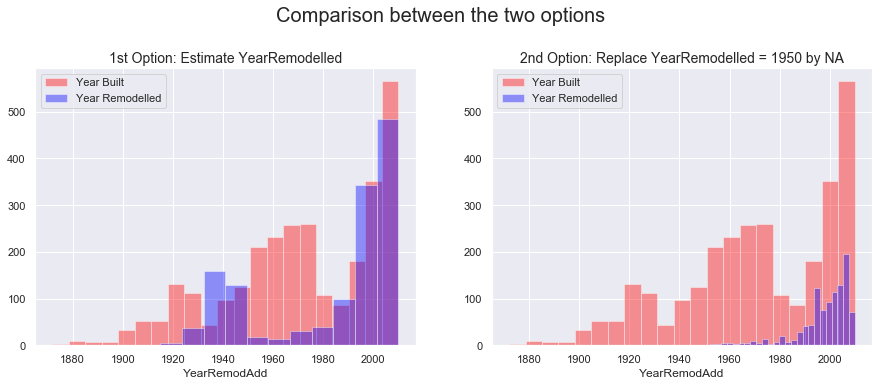

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize= (15,5.5))
plt.subplots_adjust(top = 0.825)

fig.suptitle('Comparison between the two options', fontsize=20)
ax[0].set_title('1st Option: Estimate YearRemodelled', fontsize = 14)
ax[1].set_title('2nd Option: Replace YearRemodelled = 1950 by NA', fontsize = 14)

sns.distplot( data['YearBuilt'].dropna() , color="red", label="Year Built",  kde= False, ax= ax[0])
sns.distplot(FrstOpt_YearRemodAdd.YearRemodAdd.dropna(), color="blue", label="Year Remodelled",kde= False, ax=ax[0])
ax[0].legend()

sns.distplot( data['YearBuilt'].dropna() , color="red", label="Year Built",  kde= False, ax= ax[1] )
sns.distplot(SecndOpt_YearRemodAdd.YearRemodAdd.dropna(), color="blue", label="Year Remodelled", kde= False, ax= ax[1])
ax[1].legend()


The first option has reduced the peak at 1950 and resulted in a shape that's closer to what we expect. On the other hand, the second options seems to greatly change the distribution of **YearRemodAdd**. So, we will go with the first option and update the original data frame.

In [25]:
data.loc[data.YearRemodAdd== 1950,'YearRemodAdd'] = FrstOpt_YearRemodAdd
#Drop the column 'difference' we created earlier
data.drop(columns=['difference'], inplace= True)

#### 1.3.2.2 Data compatibility

Data compatibility refers to the issues of comparability that arise from merging two or more datasets. Since we have only one dataset, we may not suffer from common comparability issues such as: different units of measurement, different spelling of names, different currency ... etc. That said, we may suffer from duplicate records. So, let's check if we have any duplicates.

In [26]:
data.duplicated(subset= data.columns.drop('Id')).sum()

0

Here, we have the number of duplicated rows is zero. Hence, we don't have any duplicate values.<br/>

#### 1.3.2.3 Dealing with missing values

After correcting errors, and checking for ensure data compatibility the next step is to deal with missing values. The is step is somewhat tricky for this dataset specially for categorical features because some features have a category value named *NA*. For these features, *NA* represents a meaningful piece of data which means this feature doesn't exist in this house. On the contrary, the null values *NA* means that we don't now whether this feature exists in this house or not. To tackle this problem, we will follow these steps:<br/>

1- Identify which features have NA values, then<br/>
2- Check if the feature is exclusive such that there's no other feature is describing the same house object.<br/>
3- For exclusive features:
  * A) If the feature is categorical, check whether these features have a category value called *NA* (by referring to data description file), if yes, fill by 'Not exist'. Otherwise, fill by the most common value.
  * B) If the feature is numeric, impute the missing value by the appropriate imputation method. 

4- For non-exclusive features: try to infer whether it's a null value or a category value from other features describing the same house object (e.g. **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageCars**, **GarageArea**, **GarageQual**, and **GarageCond** describe different aspects of the garage).

<img src="files/Filling missing values flowchart.jpg" style= "height:600px"/>

##### Step1:
Identify which features have NA values, the number of NA values in each feature, and the percentage of NA.

In [27]:
# Identify the number of NAs in each feature and select only those having NAs
total_NA = data.drop(columns='SalePrice').isnull().sum()[data.isnull().sum() != 0]

# Calculate the percentage of NA in each feature
percent_NA = data.drop(columns='SalePrice').isnull().sum()[data.isnull().sum() != 0]/data.shape[0]

# Summarize our findings in a dataframe
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NAs', 'Percentage']).sort_values('Total NAs', ascending=False)
missing

,Total NAs,Percentage
PoolQC,2909,1.00
MiscFeature,2814,0.96
Alley,2721,0.93
Fence,2348,0.80
YearRemodAdd,1560,0.53
FireplaceQu,1420,0.49
LotFrontage,486,0.17
GarageFinish,159,0.05
GarageYrBlt,159,0.05
GarageQual,159,0.05


We have a total of 35 features having NA values.

##### Step2: 
Check which of these 35 features is exclusive such that there's no other feature is describing the same house object.

**Group A: Exclusive features**<br/>
By referring to data description file, we found 8 features that are exclusive:<br/> (**Alley**, **YearRemodAdd**, **Fence**, **LotFrontage**, **Electrical**, **MSZoning**, **Utilities**, **Functional**)

**Group B: Non-exclusive features**<br/>
And we found 27 features that are non-exclusive:<br/>
( **MasVnrType**, **MasVnrArea**, **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **TotalBsmtSF**, **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **BsmtFullBath**, **BsmtHalfBath**, **FireplaceQu**, **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageQual**, **GarageCond**, **GarageCars**, **PoolQC**, **MiscFeature**, **SaleType**, **GarageArea**, **KitchenQual**, **Exterior1st**, **Exterior2nd**).

##### Step3 : Exclusive features
  
+ A) For categorical features:
  * i) Features having NA as a category level (by referring to data description file): **Alley**, and **Fence**. 
  We have no option but to assume all NAs are a category value. So, we would replace them by a more meaningful value such as: 'Not exist'. 
  
  * ii) Features that don't have a category level called NA: **Electrical**, **MSZoning**, **Utilities**, and **Functional**.
  We will fill these NAs as follows:
     - **Electrical**: most common **Electrical** for houses having the same **CentralAir**.
     - **MSZoning**: most common **MSZoning** for houses having the same **Condition1** and **Condition2**.
     - **Utilities**: most common **Utilities** for houses having the same **Functional**.
     - **Functional**: most common **Functional** for houses having the same **OverallCond**.

In [28]:
# Filling NAs for categorical features in group A.
data.loc[(data.Alley.isnull()) | (data.Fence.isnull()),
         ['Alley', 'Fence']] = 'Not exist'

data.loc[data.Electrical.isnull(), 'Electrical'] = data.loc[data.CentralAir ==
                                                            data.loc[data.Electrical.isnull(), 'CentralAir'].values[0], 'Electrical'].describe()['top']

data.loc[data.MSZoning.isnull(), 'MSZoning'] = data.loc[(data.Condition1 == data.loc[data.MSZoning.isnull(), 'Condition1'].values[0]) & (
    data.Condition2 == data.loc[data.MSZoning.isnull(), 'Condition2'].values[0]), 'MSZoning'].describe()['top']

data.loc[data.Utilities.isnull(), 'Utilities'] = data.loc[data.Functional ==
                                                          data.loc[data.Utilities.isnull(), 'Functional'].values[0], 'Utilities'].describe()['top']

data.loc[data.Functional.isnull(), 'Functional'] = data.loc[data.OverallCond ==
                                                            data.loc[data.Functional.isnull(), 'OverallCond'].values[0], 'Functional'].describe()['top']

+ B) For numeric features (i.e. **YearRemodAdd** and **LotFrontage**):
   * **YearRemodAdd**: these are the NAs we have set earlier for houses that have never remodeled. So, we will leave this feature as it is now and the NAs will be handled later during the modeling phase. 
   * **LotFrontage**: we will impute the missing value using the linear regression method.

Imputing missing values using the linear regression method is best suited when the only missing value in the row is the value to be imputed. In doing so, we'll follow these steps:
+ 1) Define candidate features that may related to the **LotFrontage**.
+ 2) Select rows for which no column can have missing values except the **LotFrontage**.
+ 3) Explore data:
  * a) On a univariate basis: to check for gross data errors.
  * b) Study bivariate relationships to reveal other outliers, to suggest possible transformations, and to identify possible multicollinearity.
+ 3) Split the selected rows into three sets: train/valid/test such that:
  * train/valid: are 70%, and 30% of rows whose **LotFrontage** is not NA, respectively.
  * test: are the rows whose **LotFrontage** is NA. And these are the NAs to be imputed.
+ 4) Use training data to identify several candidate models using the best subset feature selection method.
+ 5) Select and evaluate a few good models:
  * Select the models based on the adjusted-R-Sq and the number of features.
  * Check the selected models for compliance with model assumptions (LINE assumptions).
+ 6) Select the final model:
  * Compare the competing models by cross-validation against the valid set.
  * Consider residual plots, outliers, parsimony, and relevance while comparing competing models.
  
For more on regression model building, check this <a href="https://newonlinecourses.science.psu.edu/stat462/node/89/">link</a> . Let's begin!<br/>



1) Define candidate features that may related to the LotFrontage:<br/>
From the 79 features available, we think the most relevant features are: **LotShape**, **GrLivArea**, **BldgType**, **LotArea**, **LotConfig**, and **HouseStyle**.<br/>

**Note**: Candidate features can be identified by means of both graphical methods such as scatter plots and quantitative methods such as Pearson correlation coefficient and its variants.

Text(0.5, 1, 'Correlation Coefficient\n vs. LotFrontage')

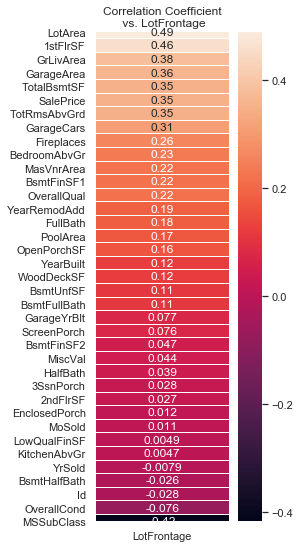

In [29]:
sns.set(rc={'figure.figsize': (3, 9)})
sns.heatmap(data=data.corr()[['LotFrontage']].sort_values('LotFrontage', ascending=False)[
            1:], linewidths=0.025, annot= True).set_title('Correlation Coefficient\n vs. LotFrontage')

2) Select rows for which no column can have missing values except the **LotFrontage**.

In [30]:
cnddt_vars = ['LotShape', 'GrLivArea', 'BldgType', 'LotArea', 'LotConfig', 'HouseStyle']
temp_vars = data[cnddt_vars].dropna(axis = 0)
temp_resp = data.iloc[temp_vars.index][['LotFrontage']]
subset = pd.concat([temp_vars, temp_resp], axis = 1)

3) Explore data:
  + a) On a univariate basis: to check for gross data errors.

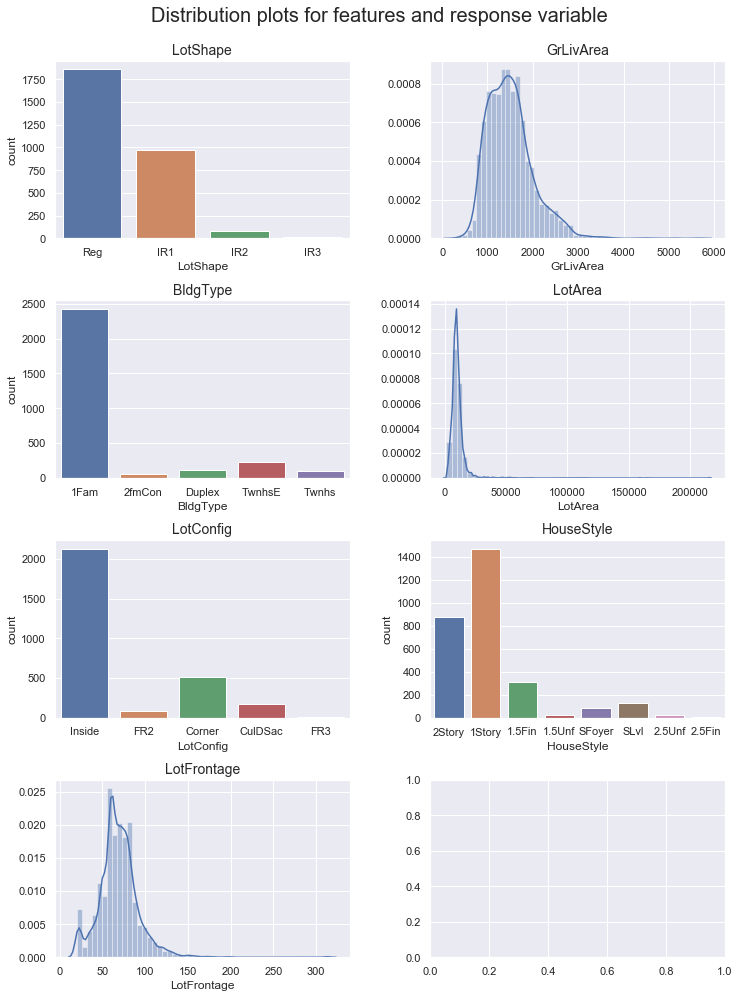

In [31]:
fig, ax = plt.subplots(figsize=(12, 15), ncols=2, nrows=4)
fig.suptitle('Distribution plots for features and response variable', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.93,
    wspace=0.275,
    hspace= 0.35)

allcolumns = np.array(subset.columns.tolist()+['']).reshape(4,2)
for i in range(4):
    for j in range(2):
        if i == 3 and j == 1:
            continue
        ax[i][j].set_title(allcolumns[i][j], fontsize=14)
        if (data[allcolumns[i][j]].dtypes == 'float64') | (allcolumns[i][j] in int_as_float):
            sns.distplot(data.loc[(data[allcolumns[i][j]].isna() == False) & (data[allcolumns[i][j]] != 0),
                                      allcolumns[i][j]], ax=ax[i, j], kde=True)
        else:
            sns.countplot(data[allcolumns[i][j]].fillna('NA'), ax=ax[i, j])

We can't notice something unusual such as bimodal distributions. The only thing is that **LotArea**, **GrLivArea** and **LotFrontage** are right skewed. But, we will deal with this problem in a later step.

+ b) Study bivariate relationships to reveal other outliers, to suggest possible transformations, and to identify possible multicollinearity.

Here, we want to plot three types of relationships:
+ **Type I**: Numeric variable vs. Numeric variable: we'll use scatter plots for this type.

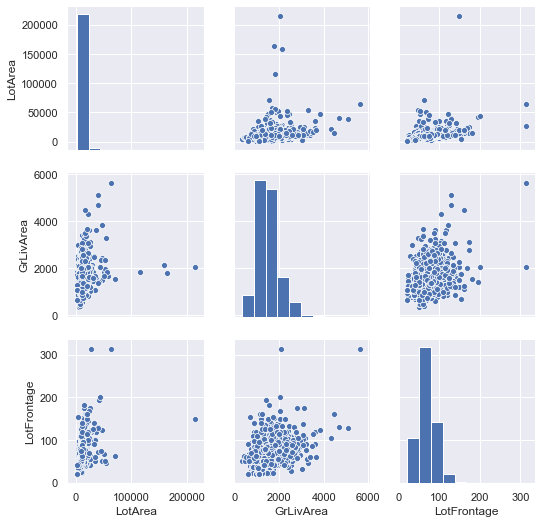

In [32]:
sns.pairplot(data= subset[['LotArea', 'GrLivArea', 'LotFrontage']])

From these scatter plots, we can notice two houses have unusually large **LotFrontage** (> 300 ft.) and four houses that have very large **LotArea** (> 100000 sq.ft.). These points are candidate outliers. Let's find out more about them.

In [33]:
subset.loc[((subset.LotFrontage > 300) | (subset.LotArea > 100000))]

,LotShape,GrLivArea,BldgType,LotArea,LotConfig,HouseStyle,LotFrontage
249,IR2,2144,1Fam,159000,CulDSac,1.5Fin,nan
313,IR3,2036,1Fam,215245,Inside,1Story,150.00
335,IR1,1786,2fmCon,164660,Corner,1.5Fin,nan
706,IR2,1824,1Fam,115149,CulDSac,1Story,nan
934,IR2,2069,1Fam,27650,Inside,1Story,313.00
1298,IR3,5642,1Fam,63887,Corner,2Story,313.00


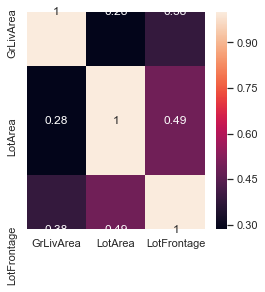

In [34]:
sns.set(rc={'figure.figsize': (4,4)})
sns.heatmap(subset.corr(), annot= True)

+ **Type II**: Categorical variable vs. Numeric variable: we'll use box plots for this type.

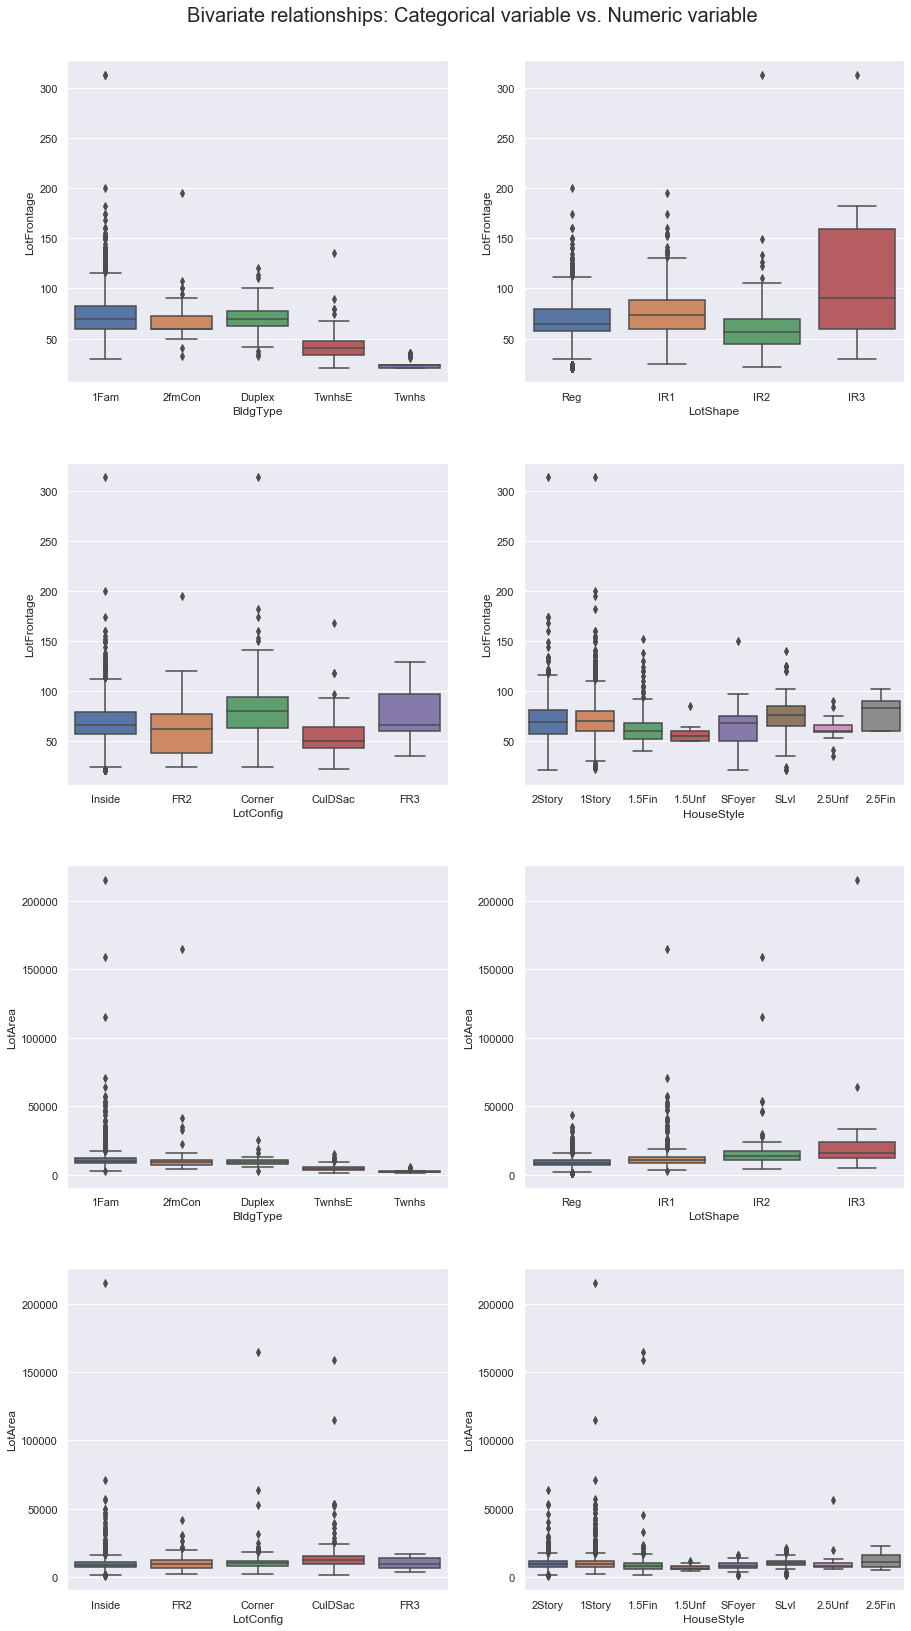

In [35]:
fig, ax = plt.subplots(figsize=(15, 25), ncols=2, nrows=4)
fig.suptitle('Bivariate relationships: Categorical variable vs. Numeric variable', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.95,
    wspace=0.2,
    hspace= 0.25)

sns.boxplot(data= subset, x= 'BldgType', y= 'LotFrontage', ax= ax[0][0])
sns.boxplot(data= subset, x= 'LotShape', y= 'LotFrontage', ax= ax[0][1])
sns.boxplot(data= subset, x= 'LotConfig', y= 'LotFrontage', ax= ax[1][0])
sns.boxplot(data= subset, x= 'HouseStyle', y= 'LotFrontage', ax= ax[1][1])

sns.boxplot(data= subset, x= 'BldgType', y= 'LotArea', ax= ax[2][0])
sns.boxplot(data= subset, x= 'LotShape', y= 'LotArea', ax= ax[2][1])
sns.boxplot(data= subset, x= 'LotConfig', y= 'LotArea', ax= ax[3][0])
sns.boxplot(data= subset, x= 'HouseStyle', y= 'LotArea', ax= ax[3][1])

The box plots shows that some features (**BdgType**, and **LotShape**) have a relationship with the **LotFrontage**. On the other hand, no relationship seems to exist between the other categorical variables and numeric variables.

+ **Type III**: Categorical variable vs. Categorical variable: we'll use mosaic plots for this type.

A mosaic plot is a graphical display that allows you to examine the relationship among two or more categorical variables. The mosaic plot starts as a square with length one. The square is divided first into horizontal bars whose widths are proportional to the probabilities associated with the first categorical variable. Then each bar is split vertically into bars that are proportional to the conditional probabilities of the second categorical variable.<br/>
The color of tiles in mosaic plot is coded as follows:
+ *Green*: if the observed frequency is within two standard deviations of the expected frequency under independence hypothesis.
+ *Red*: if the observed frequency is more than two standard deviations in the positive direction.
+ *Blue*: if the observed frequency is more than two standard deviations in the negative direction.
+ *Hatching*: if the observed frequency is more than three standard deviations from the expected frequency in either direction.

For more on Mosaic plots:
+ <a href="https://towardsdatascience.com/mosaic-plot-and-chi-square-test-c41b1a527ce4">Mosaic Plot and Chi-Square Test</a>.
+ <a href="https://www.jstor.org/stable/2291215?seq=1#page_scan_tab_contents">Mosaic Displays for Multi-Way Contingency Tables</a>
+ <a href="https://www.youtube.com/watch?v=VYKbIudYVvI">Core Two categorical variables Mosaic Plots </a>

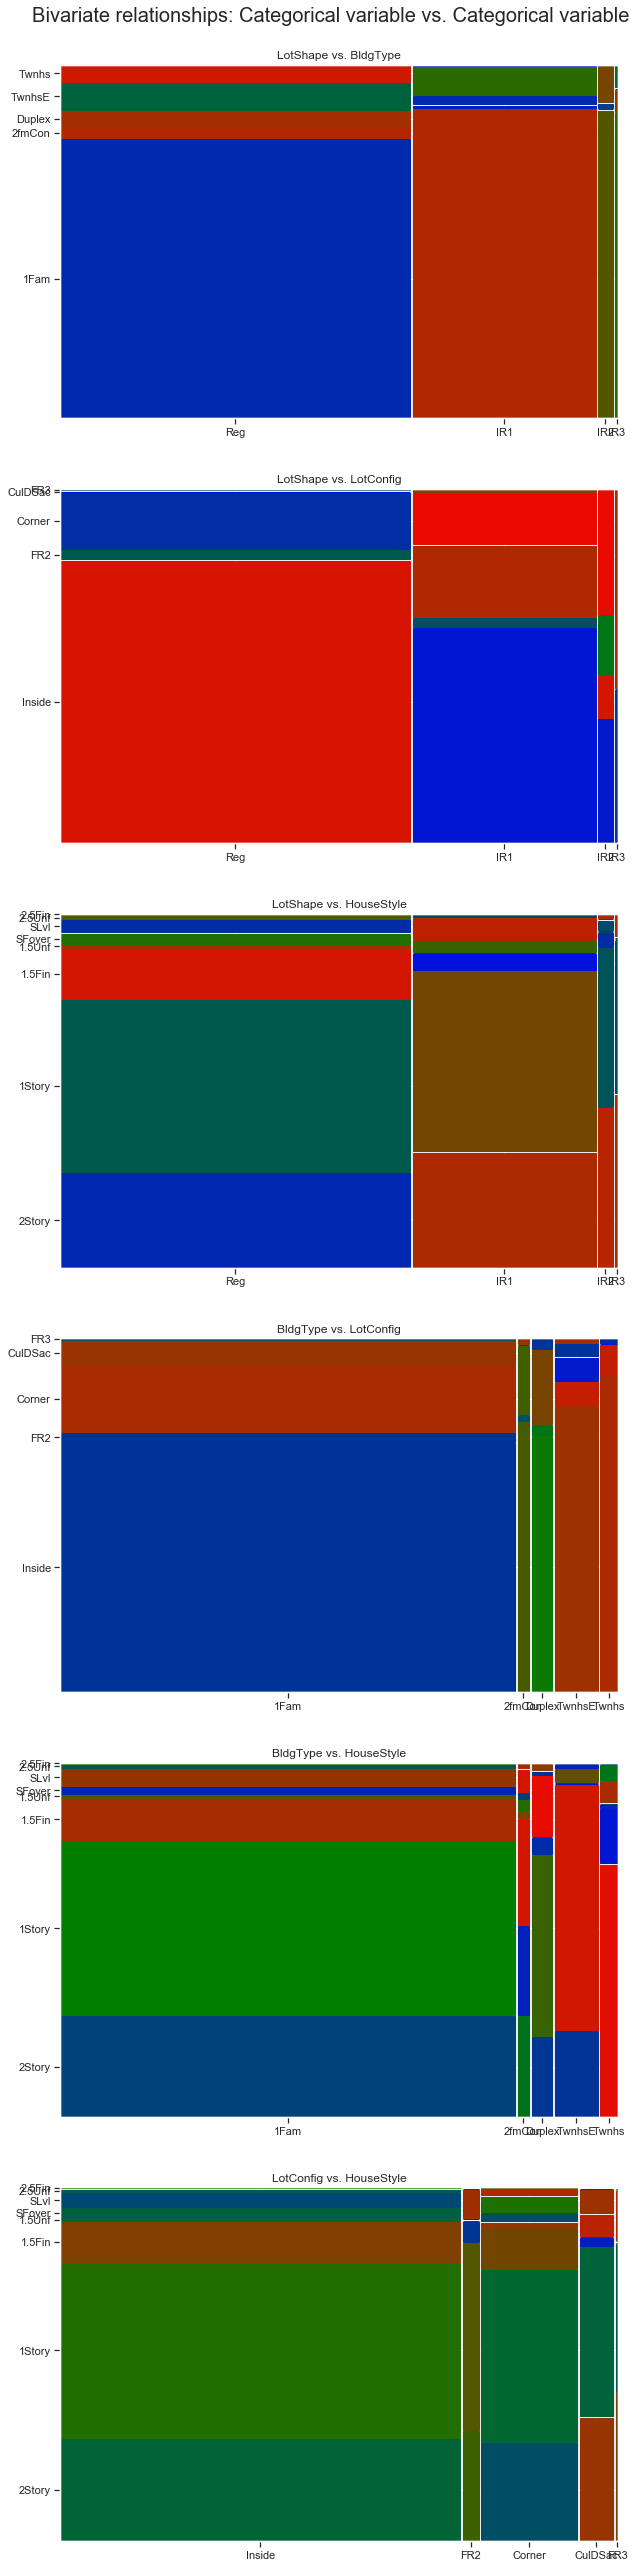

In [36]:
fig, ax = plt.subplots(figsize=(10, 40), ncols=1, nrows=6)
fig.suptitle('Bivariate relationships: Categorical variable vs. Categorical variable', fontsize=20)
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    bottom=0.1,
    top=0.96,
    wspace=0.275,
    hspace= 0.2)

#Find all possible combination of categorical features without repeation
ctg = subset.dtypes[subset.dtypes == 'object'].index.tolist()
x = []
for i in range(len(ctg)-1):
    j = i +1
    while j != len(ctg):
        x.append([ctg[i],ctg[j]])
        j += 1

for i in range(len(x)):
    title = '{0} vs. {1}'.format(x[i][0],x[i][1])
    mosaic(data=subset, index=[x[i][0], x[i][1]], axes_label=True,
       statistic=True, gap=0.005, title= title, ax= ax[i])
        
plt.show()

+ 4) Use training data to identify several candidate models using the best subset feature selection method.
+ 5) Select and evaluate a few good models:

Now let's give it a try and fit a linear regression model to all features we have and check the residual plots to detect any potential outliers. We need also to select best features for our model and check if data transformation is needed.

The linear regression model has four assumptions that need to be satisfied before drawing any useful conclusions based on the model. These assumptions are called (**LINE** assumptions):
+ 1) Linearity: the mean response is a linear function of the predictors. In other words, the residuals have a mean of zero.
+ 2) Independence of residuals.
+ 3) Normality of residuals.
+ 4) Equal variance: the residuals are assumed to have equal variance.

For more on Linear Regression model assumptions, check this <a href="https://newonlinecourses.science.psu.edu/stat462/node/145/">link</a>.

In [37]:
missing_LF = subset.loc[subset.LotFrontage.isnull()].drop(columns=['LotFrontage']) #Rows having LotFrontage to be imputed.
have_LF = subset.loc[~subset.LotFrontage.isnull()].reset_index()

In [38]:
lm1 = ols('LotFrontage ~ GrLivArea + LotArea + LotShape + BldgType +  LotConfig + HouseStyle',
         data=have_LF).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LotFrontage   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:24:43   Log-Likelihood:                -10085.
No. Observations:                2433   AIC:                         2.021e+04
Df Residuals:                    2412   BIC:                         2.033e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               41.7242      1.834     22.754      0.000      38.128      45.320
LotShape[T.IR2]         -1.1916      2.374     -0.502      0.616      -5.846       3.463
LotShape[T.IR3]         13.7256      4.951      2.773      0.006       4.018      23.434
LotShape[T.Reg]         -2.4516      0.767     -3.197      0.001      -3.956      -0.948
BldgType[T.2fmCon]      -2.1363      2.054     -1.040      0.298      -6.165       1.892
BldgType[T.Duplex]      -6.3432      1.688     -3.759      0.000      -9.653      -3.034
BldgType[T.Twnhs]      -33.9204      1.766    -19.210      0.000     -37.383     -30.458
BldgType[T.TwnhsE]     -26.9797      1.237    -21.803      0.000     -29.406     -24.553
LotConfig[T.CulDSac]   -35.4915      1.906    -18.620      0.000     -39.229     -31.754
LotConfig[T.FR2]       -13.3377      2.080     -6.412      0.000     -17.417      -9.259
LotConfig[T.FR3]         4.9078      4.930      0.996      0.320      -4.759      14.575
LotConfig[T.Inside]    -10.7367      0.849    -12.649      0.000     -12.401      -9.072
HouseStyle[T.1.5Unf]     3.4925      3.755      0.930      0.352      -3.870      10.855
HouseStyle[T.1Story]    14.4460      1.052     13.737      0.000      12.384      16.508
HouseStyle[T.2.5Fin]   -11.4290      5.606     -2.039      0.042     -22.423      -0.435
HouseStyle[T.2.5Unf]   -11.3561      3.591     -3.162      0.002     -18.398      -4.314
HouseStyle[T.2Story]     4.0818      1.137      3.590      0.000       1.852       6.311
HouseStyle[T.SFoyer]    17.5050      2.217      7.895      0.000      13.157      21.853
HouseStyle[T.SLvl]      15.4748      1.851      8.361      0.000      11.845      19.104
GrLivArea                0.0171      0.001     21.116      0.000       0.016       0.019
LotArea                  0.0008   5.97e-05     13.564      0.000       0.001       0.001
==============================================================================
Omnibus:                     1396.197   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50280.306
Skew:                           2.101   Prob(JB):                         0.00
Kurtosis:                      24.871   Cond. No.                     2.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The probability of the F-statistic is less than 0.01, which means that the model containing at least one of the features we have is useful in predicting the response variable. Also, the Adj. R-squared is moderate (0.542).

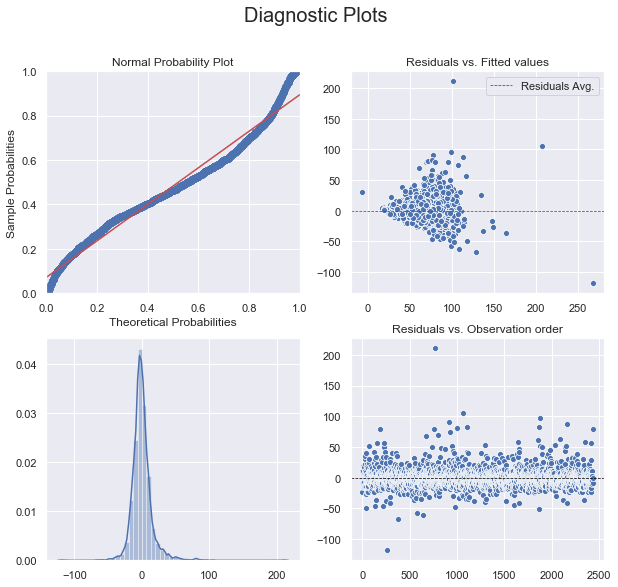

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,9))
fig.suptitle('Diagnostic Plots', fontsize=20)

ax[0][1].axhline(np.mean(lm1.resid), color='red', ls='--', lw = 0.75, label='Residuals Avg.')
ax[1][1].axhline(0, color='black', ls='--', lw = 0.75)

ax[0][0].set_title('Normal Probability Plot')
probplot = ProbPlot(lm1.resid, fit= True)
probplot.ppplot(line= 'r', ax= ax[0][0])

sns.scatterplot(x= lm1.fittedvalues, y= lm1.resid, ax= ax[0][1]).set_title('Residuals vs. Fitted values')
sns.distplot(lm1.resid, ax= ax[1][0])
sns.scatterplot(x= have_LF.index, y= lm1.resid, ax= ax[1][1]).set_title('Residuals vs. Observation order')
plt.show()

The residuals vs. fitted values scatter plot shows that the average of residuals, *red line*, is very close to zero, so the linearity assumption is satisfied. But the vertical spread of residuals is not approximately constant. So, the constant variance assumption is also violated.<br/> The normal probability plot along with the histogram show that the residuals slightly right skewed and have long tails. So, the normality assumption is violated.

**Influential points**<br/>we can notice one point that has very large absolute residual. This point can be an influential point such that it excessively affect our model. We will use three quantitative measures to investigate that data point as follows:
+ **Studentized residuals**: a data point with |studentized residual| > 3 and very different from other points can be considered as influential.
+ **Difference of fits (DFFITS)**: any point have |DIFFITS| > 2(k+2/n-k-2)^0.5 and very different from other points can be considered influential.
+ **Cook's distance**: a data point with Cook's distance > 0.5 and very different from other data points is an influential.

For more on Influential Points, check this <a href="https://newonlinecourses.science.psu.edu/stat462/node/87/">link<a/>.

In [40]:
#The data point that could be influential
have_LF.iloc[[lm1.resid.sort_values().head(1).index[0]]]

,index,LotShape,GrLivArea,BldgType,LotArea,LotConfig,HouseStyle,LotFrontage
260,313,IR3,2036,1Fam,215245,Inside,1Story,150.00


For this data point, the **LotArea** is unusually large (215245 SF).

In [41]:
k = have_LF.shape[1] - 1 #No. of predictors
n = have_LF.shape[0] #No. of observations
diffits_ref = 3*np.sqrt((k+2)/(n-k-2)) #Reference value of DIFFITS
influence = lm1.get_influence()
print(diffits_ref)

0.1828000043330372


In [42]:
influence.summary_frame().loc[(influence.summary_frame(
).cooks_d > 0.5), influence.summary_frame().columns[-6:]]

,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
260,7.79,-11.51,0.55,-12.79,-11.84,-13.15


From the above influence summary, we found the suspected data point has very high Cooks's distance. It also has large absolute studentized residuals (11.84), and large absolute difference of fits (13.15). So, we can consider this data point as influential and we will refit the model after omitting it.

In [43]:
have_LF.drop([260], inplace= True)

+ 6) Select the final model:

In [44]:
lm2 = ols('np.log(LotFrontage) ~ np.log(GrLivArea) + np.log(LotArea) + LotShape + BldgType +  LotConfig + HouseStyle',
         data=have_LF).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(LotFrontage)   R-squared:                       0.753
Model:                             OLS   Adj. R-squared:                  0.751
Method:                  Least Squares   F-statistic:                     367.4
Date:                 Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                         15:25:27   Log-Likelihood:                 751.94
No. Observations:                 2432   AIC:                            -1462.
Df Residuals:                     2411   BIC:                            -1340.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3692      0.120     -3.072      0.002      -0.605      -0.134
LotShape[T.IR2]         -0.1229      0.028     -4.441      0.000      -0.177      -0.069
LotShape[T.IR3]          0.0741      0.057      1.290      0.197      -0.039       0.187
LotShape[T.Reg]         -0.0099      0.009     -1.095      0.274      -0.028       0.008
BldgType[T.2fmCon]      -0.0367      0.024     -1.537      0.125      -0.084       0.010
BldgType[T.Duplex]      -0.0589      0.020     -2.983      0.003      -0.098      -0.020
BldgType[T.Twnhs]       -0.5414      0.026    -20.866      0.000      -0.592      -0.491
BldgType[T.TwnhsE]      -0.3390      0.017    -19.543      0.000      -0.373      -0.305
LotConfig[T.CulDSac]    -0.5148      0.022    -23.204      0.000      -0.558      -0.471
LotConfig[T.FR2]        -0.2122      0.024     -8.766      0.000      -0.260      -0.165
LotConfig[T.FR3]         0.0521      0.057      0.909      0.363      -0.060       0.165
LotConfig[T.Inside]     -0.1242      0.010    -12.576      0.000      -0.144      -0.105
HouseStyle[T.1.5Unf]     0.0736      0.044      1.678      0.093      -0.012       0.160
HouseStyle[T.1Story]     0.1719      0.013     13.633      0.000       0.147       0.197
HouseStyle[T.2.5Fin]    -0.0198      0.065     -0.306      0.760      -0.147       0.107
HouseStyle[T.2.5Unf]    -0.1065      0.042     -2.553      0.011      -0.188      -0.025
HouseStyle[T.2Story]     0.0640      0.013      4.869      0.000       0.038       0.090
HouseStyle[T.SFoyer]     0.2089      0.026      7.970      0.000       0.158       0.260
HouseStyle[T.SLvl]       0.1822      0.022      8.421      0.000       0.140       0.225
np.log(GrLivArea)        0.2429      0.016     15.300      0.000       0.212       0.274
np.log(LotArea)          0.3142      0.013     24.586      0.000       0.289       0.339
==============================================================================
Omnibus:                      265.001   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.461
Skew:                           0.387   Prob(JB):                    5.14e-297
Kurtosis:                       6.587   Cond. No.                         395.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After omitting the influential data point and applying transformations for both response and numeric predictors, We can notice that the Adj. R-squared has increased from 0.568 to 0.751. We have to check model assumptions again.

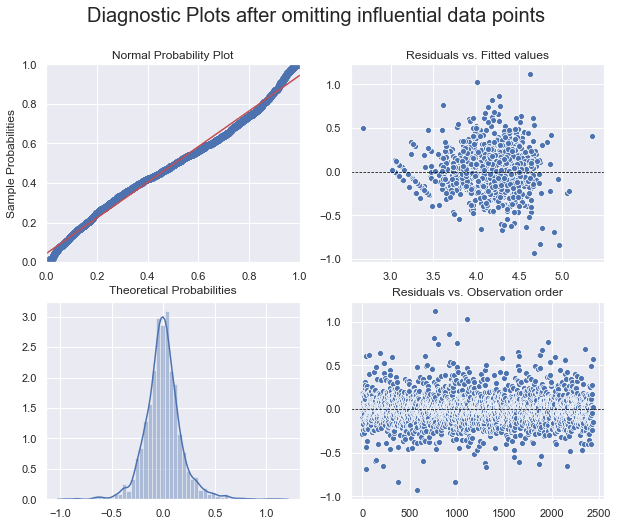

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.suptitle('Diagnostic Plots after omitting influential data points', fontsize=20)

ax[0][1].axhline(0, color='black', ls='--', lw = 0.75)
ax[1][1].axhline(0, color='black', ls='--', lw = 0.75)

ax[0][0].set_title('Normal Probability Plot')
probplot = ProbPlot(lm2.resid, fit= True)
probplot.ppplot(line= 'r', ax= ax[0][0])

sns.scatterplot(x= lm2.fittedvalues, y= lm2.resid, ax= ax[0][1]).set_title('Residuals vs. Fitted values')
sns.distplot(lm2.resid, ax= ax[1][0])
sns.scatterplot(x= have_LF.index, y= lm2.resid, ax= ax[1][1]).set_title('Residuals vs. Observation order')
probplot = ProbPlot(lm2.resid, fit= True)

The normal probability plot and the histogram show the residuals became almost normal.
The residuals vs. fitted values plot shows that residuals variance became more likely to be equal such that the residuals became more evenly distributed around the zero.<br/>
Now, we can use our model to predict the missing values in **LotFrontage**.

In [46]:
subset.loc[subset.LotFrontage.isnull(), 'LotFrontage'] = np.exp(lm2.predict(missing_LF))
data['LotFrontage'] = subset.LotFrontage

##### Step 4: Non-exclusive features
This group includes features which describe a house object for which there are several features describing different aspect of it:(**BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **FireplaceQu**, **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageQual**, **GarageCond**, **GarageCars**,**PoolQC**, and **MiscFeature**).<br/>
   
   For this subgroup, we will check whether NAs are persistent across all categorical features describing the same house object and the numerical features have zeros. For example, houses that don't have a garage will have a value of NA for the features: **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageQual**, and **GarageCond**. And other numeric features describing the same house object: **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **GarageArea**, **GarageCars**, and **TotalBsmtSF** will equal zero. If NAs are not persistent across all features describing the same house object and corresponding numeric features don't equal zero, then it will be considered as a missing value.<br/>

In the following, we will consider each group of features describing the same house object.

A) Features describing the house basement (**BsmtQual**, **BsmtCond**, **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **BsmtHalfBath**, **BsmtFullBath**):

In [47]:
# Find rows with consistent NAs in all features describing the basement
data.loc[(data.BsmtQual.isnull() & data.BsmtCond.isnull() & data.BsmtExposure.isnull() & data.BsmtFinType1.isnull() & data.BsmtFinType2.isnull()) & (data.BsmtFinSF1 == 0) & (data.BsmtFinSF2 == 0) & (data.BsmtUnfSF == 0) & (data.TotalBsmtSF == 0) & (data.BsmtFullBath == 0) & (data.BsmtHalfBath == 0),
         ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].shape[0]

77

So, there are 77 rows having NAs across all categorical features and zeros across all numeric features describing the basement. So, we can conclude that these houses don't have a basement and we will fill these categorical features with 'Not exist' and numeric features with 0.

In [48]:
idx = data.loc[(data.BsmtQual.isnull() & data.BsmtCond.isnull() & data.BsmtExposure.isnull() & data.BsmtFinType1.isnull() & data.BsmtFinType2.isnull()) & (data.BsmtFinSF1 == 0) & (data.BsmtFinSF2 == 0) & (data.BsmtUnfSF == 0) & (data.TotalBsmtSF == 0) & (data.BsmtFullBath == 0) & (data.BsmtHalfBath == 0),
         ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].index

In [49]:
data.loc[idx, ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2']] = 'Not exist'

data.loc[idx, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

In [50]:
# Find rows with non-consistent NAs across all features describing the basement.
data.loc[data.BsmtQual.isnull() | data.BsmtCond.isnull() | data.BsmtExposure.isnull() | data.BsmtFinType1.isnull() | data.BsmtFinType2.isnull() | (data.BsmtFinSF1.isnull()) | (data.BsmtFinSF2.isnull()) | (data.BsmtUnfSF.isnull()) | (data.TotalBsmtSF.isnull()) | (data.BsmtFullBath.isnull()) | (data.BsmtHalfBath.isnull()),
             ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].reset_index()

,index,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,332,Gd,TA,No,GLQ,"1,124.00",NaN,479.00,"1,603.00","3,206.00",1.00,0.00
1,948,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00
2,1487,Gd,TA,NaN,Unf,0.00,Unf,0.00,"1,595.00","1,595.00",0.00,0.00
3,2040,Gd,NaN,Mn,GLQ,"1,044.00",Rec,382.00,0.00,"1,426.00",1.00,0.00
4,2120,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan
5,2185,TA,NaN,No,BLQ,"1,033.00",Unf,0.00,94.00,"1,127.00",0.00,1.00
6,2188,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,nan,nan
7,2217,NaN,Fa,No,Unf,0.00,Unf,0.00,173.00,173.00,0.00,0.00
8,2218,NaN,TA,No,Unf,0.00,Unf,0.00,356.00,356.00,0.00,0.00
9,2348,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00


From the above dataframe, we can find 11 houses that have missing values as follows:<br/>
1) One house with index 332: has one missing value in **BsmtFinType2** feature.<br/>

This house has **TotalBsmtSF** of 3206. The basement has two types of finished area: the first type is a GLQ (Good Living Quarters) with **BsmtFinSF1** of 1124, second type is missing with **BsmtFinSF2** of 479, and unfinished area with **BsmtUnfSF** of 1603. We will try to impute this value, but we should use our perception of the problem to judge the correctness of imputed value. We are almost sure that **BsmtFinType2** is NOT:
+ *NA*: because the house do have a basement.
+ *Unf*: because the **BsmtFinSF2** doesn't equal **BsmtUnfSF**.
+ *GLQ*: beacuse it would the same type as **BsmtFinType1**.
+ *ALQ* or *BLQ*: because <a href="http://rockfordtownshipassessor.net/faq/69/what-is-the-difference-between-rec-room-area-and-finished-basement-living-area">it can't be a living area since the basement is not exposed</a>.<br/>
There's only two possibilities: *Rec* and *LwQ*. Let's figure out which one is more likely by plotting the count of occurrences for each **BsmtFinType2** for houses having the same **BsmtCond** and **BsmtExposure**.

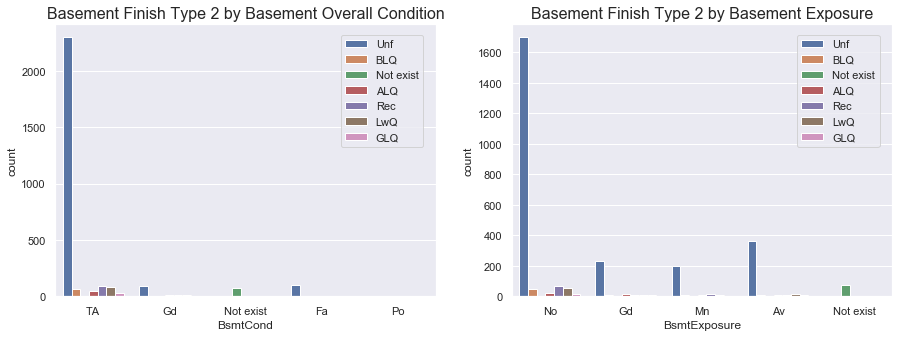

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize= (15,5))

ax[0].set_title('Basement Finish Type 2 by Basement Overall Condition', fontsize= 16)
ax[1].set_title('Basement Finish Type 2 by Basement Exposure', fontsize= 16)

sns.countplot(x='BsmtCond', hue='BsmtFinType2', data=data, ax= ax[0])
sns.countplot(x='BsmtExposure', hue='BsmtFinType2', data=data, ax= ax[1])

ax[0].legend(loc = [0.75,0.55])
ax[1].legend(loc = [0.75,0.55])

From the countplot, we can notice that houses having same **BsmtExposure** (No) and **BsmtCond** (TA) have *Unf* **BsmtFinType2**. But as we stated earlier for this house the **BsmtFinType2** is unlikely to be *Unf*. The second most likely **BsmtFinType2** is *Rec*.

So, we will replace this *NA* by *Rec*.

In [52]:
data.BsmtFinType2.iloc[[332]] = 'Rec'

2) Three houses with index 948, 1487, and 2348: has one missing value in **BsmtExposure** feature. But before we rush to impute this values, let's have a closer look at that feature and try to figure out if something is wrong. According to data description file, the **BsmtExposure** feature is described as: *refers to walkout or garden level walls*. Generally, <a href="https://www.gimme-shelter.com/basement-type-50085/">house with a walkout basement is built into a hill</a>. So, inspecting the **LandContour** and **LandSlope** features may help us guess the level of **BsmtExposure**.

In [53]:
data.iloc[[948, 1487, 2348]][['LandContour','LandSlope','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
              'BsmtFinType2','TotalBsmtSF']]

,LandContour,LandSlope,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
948,Lvl,Gtl,Gd,TA,NaN,Unf,Unf,936.00
1487,Lvl,Gtl,Gd,TA,NaN,Unf,Unf,"1,595.00"
2348,Lvl,Gtl,Gd,TA,NaN,Unf,Unf,725.00


The **LandContour** for these houses is *Lvl* (Near Flat/Level) and **LandSlope** is *Gtl* (Gentle slope). We conclude that the land is almost flat and the house is not built into a hill. So, we can conclude that true **BsmtExposure** is *No* rather than *NA* and there's a data entry error.<br/> Now, let's plot a countplot for **BsmtExposure** by **LandContour** and **LandSlope** to verify our assumption.

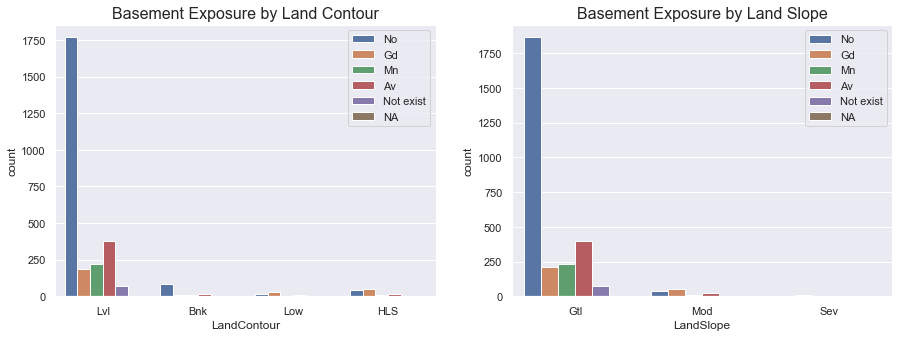

In [54]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize= (15,5))

ax[0].set_title('Basement Exposure by Land Contour', fontsize= 16)
ax[1].set_title('Basement Exposure by Land Slope', fontsize= 16)

sns.countplot(x='LandContour', hue='BsmtExposure', data=data.fillna('NA'), ax= ax[0])
sns.countplot(x='LandSlope', hue='BsmtExposure', data=data.fillna('NA'), ax= ax[1])

ax[0].legend(loc = 'best')
ax[1].legend(loc = (0.77, 0.625))

From the countplot, we can notice that the vast majority of houses having the same **LandContour** (Lvl) and **LandSlope** (Gtl) have no basement exposure. Hence, our assumption seems rational. So, we'll replace these *NAs* with *No*.

In [55]:
data.BsmtExposure.iloc[[948, 1487, 2348]] = 'No'

3) Three houses with indices 2040, 2185, and 2524: have NA values in **BsmtCond** feature. Since these houses have a basement, their NAs are missing values not a category value. We fill these NAs by the most common **BsmtCond** for houses having the same **BsmtQual** and **BsmtFinType1**.

In [56]:
for i in [2040, 2185, 2524]:
    data.BsmtCond.iloc[i] = data.loc[(data.BsmtQual == data.BsmtQual.iloc[i]) & (
        data.BsmtFinType1 == data.BsmtFinType1.iloc[i]), 'BsmtCond'].describe()['top']

4) Two houses with indices 2217, and 2218: have NA values in **BsmtQual** feature. We fill these NAs by the most common  **BsmtQual** for houses having the same **BsmtCond**.

In [57]:
for i in [2217, 2218]:
    data.BsmtQual.iloc[i] = data.loc[(
        data.BsmtCond == data.BsmtCond.iloc[i]), 'BsmtQual'].describe()['top']

5) One house with index 2120: has NA values in all features describing the basement. Since we have no clue to guess the true values, we will consider this house as if it has no basement. The categorical features will be filled by 'Not exist' and numeric features will be filled by 0.

In [58]:
data.loc[2120 , ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2']] = 'Not exist'

data.loc[2120 , ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

6) One house with index 2188: has NA values in all categorical features and some of the numeric features describing the basement. But other numeric features describing basement area are zeros. So, we can conclude that this house has no basement. The categorical features will be filled by 'Not exist' and numeric features will be filled by 0.

In [59]:
data.loc[2188 , ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2']] = 'Not exist'

data.loc[2188 , ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

B) The feature describing the fireplace (**FireplaceQu**):

Let's check whether all houses with *NA* **FireplaceQu** don't have fireplace using the **Fireplaces** feature. We will do so by calculating the total number of fireplaces in these houses.

In [60]:
data.loc[data.FireplaceQu.isnull(), ['Fireplaces']].sum()

Fireplaces    0
dtype: int64

Now, we verified that all NAs are a category value not a missing value. Let's replace those NAs by *Not exist*.

In [61]:
data.FireplaceQu.fillna('Not exist', inplace= True)

C) Features describing the garage (**GarageType**, **GarageArea**, **GarageYrBlt**, **GarageFinish**, **GarageQual**, **GarageCond**, and **GarageCars**):

All these features have 159 NA values except: **GarageType** has 157 NA values, **GarageCars** and **GarageArea** have only 1 NA value.<br/>
Let's check whether NAs are consistent across all categorical features and numeric features have zeros. We'll do so by summing up all NAs across each feature and check whether it equals zero or not.

In [62]:
data.loc[data.GarageType.isnull() & data.GarageYrBlt.isnull() & data.GarageFinish.isnull() & data.GarageQual.isnull() & data.GarageCond.isnull() & (data.GarageArea == 0) & (data.GarageCars == 0),
         ['GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                                                                'GarageCond', 'GarageCars']].shape[0]

157

So, there are 157 rows having NAs across all categorical features describing the garage and zeros in all numeric features. For these rows, we can conclude that all NAs are actually a category value not missing value. So, we will replace NAs in these features by 'Not exist' except **GarageYrBlt** we will leave NAs to be handled during the modeling phase.

In [63]:
data.loc[data.GarageType.isnull() & data.GarageFinish.isnull() & data.GarageQual.isnull() & data.GarageCond.isnull() & (data.GarageArea == 0) & (data.GarageCars == 0),
         ['GarageType', 'GarageArea', 'GarageFinish', 'GarageQual',
                                                    'GarageCond']] = 'Not exist'

Now, let's find rows that don't have consistent NAs across all features describing the garage.

In [64]:
data.loc[data.GarageType.isnull() | data.GarageFinish.isnull() | data.GarageQual.isnull() | data.GarageCond.isnull() | data.GarageCars.isnull() | data.GarageArea.isnull(),
         ['GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                                                    'GarageCond', 'GarageCars']]

,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars
2126,Detchd,360.00,nan,NaN,NaN,NaN,1.00
2576,Detchd,NaN,nan,NaN,NaN,NaN,nan


We have two rows (indices: 2126, and 2576) that don't have consistent NAs across all features describing the garage.<br/>
The first one, with index 2126, seems to have real missing values in features: **GarageYrBlt**, **GarageFinish**, **GarageQual**, **GarageCond**. We'll impute them as follows:<br/>
 * **GarageYrBlt** = House **YearBuilt** + Average difference between(YearBuilt, GarageYrBlt) for the same **GarageType** in the same **Neighborhood**. 
 * **GarageFinish**, **GarageQual**, **GarageCond**: will be filled by the most frequent values for Garages of the same type and the same car capacity (i.e. **GarageCars**).

In [65]:
# Imputing GarageYrBlt, GarageFinish, GarageQual, and GarageCond for row no. 2126
data.at[2126,'GarageYrBlt'] = data.iloc[2126]['YearBuilt'] + data.loc[(data.GarageType == 'Detchd') & (data.Neighborhood == 'OldTown'), [
    'GarageYrBlt', 'YearBuilt']].apply(lambda x: x[0] - x[1], axis=1).mean().round(0)

data.at[2126, 'GarageFinish'] = data.loc[(data.GarageType == 'Detchd') & (
    data.GarageCars == 1)].GarageFinish.describe()['top']

data.at[2126, 'GarageQual'] = data.loc[(data.GarageType == 'Detchd') & (
    data.GarageCars == 1)].GarageQual.describe()['top']

data.at[2126, 'GarageCond'] = data.loc[(data.GarageType == 'Detchd') & (
    data.GarageCars == 1)].GarageCond.describe()['top']

The Second row, with index 2576, have NAs in all features describing the garage except the **GarageType**. It's more likely to be data entry error. So, we will replace the **GarageType** and other categorical features by 'Not exist' and we will replace numeric features by 0  as if the house doesn't have a garage. 

In [66]:
data.loc[2576, ['GarageType','GarageFinish','GarageQual','GarageCond']] = 'Not exist'

data.loc[2576, ['GarageArea', 'GarageCars']] = 0

D) Feature describing the pool (**PoolQC**):

Let's check whether all houses with *NA* **PoolQC** don't have pool using the **PoolArea** feature. We will do so by calculating the total pool area for these houses.

In [67]:
data.loc[data.PoolQC.isnull(), ['PoolArea']].sum()

PoolArea    1373
dtype: int64

Since the total pool area for these houses doesn't equal zero, we can conclude that there are one or more houses having missing values in the **PoolQC**. Let's find out the indices of these houses.

In [68]:
data.loc[(data.PoolQC.isnull()) & (data.PoolArea != 0), ['PoolQC', 'PoolArea']]

,PoolQC,PoolArea
2420,NaN,368
2503,NaN,444
2599,NaN,561


We will fill these rows by the most common **PoolQC**.

In [69]:
data.loc[[2420,2503,2599],'PoolQC'] = data.PoolQC.describe()['top']

The remaining rows that have NAs in **PoolQC**, also have zeros in **PoolArea** which means these houses don't have pool. We will fill these NAs by 'Not exist'.

In [70]:
data.loc[(data.PoolQC.isnull()), 'PoolQC'] = 'Not exist'

E) Feature describing miscellaneous features (**MiscFeature**):

Let's check whether all houses with *NA* **MiscFeature** don't have miscellaneous features using the **MiscVal** feature. We will do so by calculating the total value of miscellaneous features for these houses.

In [71]:
data.loc[data.MiscFeature.isnull(), ['MiscVal']].sum()

MiscVal    17000
dtype: int64

Since the total value of miscellaneous features for these houses is not zero, there are one or more houses having missing values in the **MiscFeature**. Let's find out the indices of these houses.

In [72]:
data.loc[(data.MiscFeature.isnull()) & (data.MiscVal != 0), ['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal
2549,NaN,17000


There's one house with missing value in the **MiscFeature**. Since, we have no clue to guess what type of **MiscFeature** that may exist, we will it by 'Othr'.

In [73]:
data.loc[2549, 'MiscFeature'] = 'Othr'

For the remaining houses with NAs in **MiscFeature**, we can conclude that these houses don't have miscellaneous features. Hence, NAs are a category value not a missing value and we'll replace them by 'Not exist'.

In [74]:
data.MiscFeature.fillna('Not exist', inplace= True)

F) Features describing Masonry veneer:<br/> 

For all houses having NAs in both **MasVnrArea** and **MasVnrType**, We'll replace NAs in **MasVnrType** by 'None' and those in **MasVnrArea** by 0.

In [88]:
indx = data.loc[data.MasVnrArea.isnull() & data.MasVnrType.isnull()].index
data.loc[indx, 'MasVnrType'] = 'None'
data.loc[indx, 'MasVnrArea'] = 0

There is only one house remaining with NA in **MasVnrType**. We will fill this NA by the most frequent **MasVnrType** except the 'None' because it does have a Masonry veneer.

In [89]:
data.loc[data.MasVnrType.isnull(), 'MasVnrType'] = data.MasVnrType.value_counts().index[1]

g) Features describing the Exterior covering on house (**Exterior1st**, and **Exterior2nd**):<br/>

We will fill these NAs with 'Other'.

In [90]:
data.loc[data.Exterior1st.isnull(), ['Exterior1st', 'Exterior2nd']] = 'Other'

h) Features describing kitchen (**KitchenQual**):<br/>

We will fill this NA the most frequent **KitchenQual** for houses having the same **OverallQual**.

In [91]:
data.loc[data.KitchenQual.isnull(), 'KitchenQual'] = data.loc[data.OverallQual == data.loc[data.KitchenQual.isnull(), 'OverallQual'].values[0],
         'KitchenQual'].describe()['top']

i) Feature describing the sale (i.e. **SaleType**):<br/>

We will fill this NA by the most frequent **SaleType** for houses having the same **SaleCondition**.


In [102]:
data.loc[data.SaleType.isnull(), 'SaleType'] = data.loc[data.SaleCondition == data.loc[data.SaleType.isnull(), 'SaleCondition'].values[0],
         'SaleType'].describe()['top']

In [104]:
data.drop(columns='SalePrice').isnull().sum()[data.isnull().sum() != 0]

GarageYrBlt      158
YearRemodAdd    1560
dtype: int64

Now, we have imputed all NAs except those of two features that will be handled during the modeling phase. It's time to move on to the last step in this first phase, the *Data assessment*.

## 1.4 Data assessment

### 1.4.1 Descriptive statistics

This step starts with the calculation of some descriptive statistics. 

In [160]:
data.groupby(['YrSold'])[['SalePrice']].describe()

SalePrice                                                       \
           count       mean       std       min        25%        50%   
YrSold                                                                  
2006      314.00 182,549.46 79,426.84 35,311.00 131,375.00 163,995.00   
2007      329.00 186,063.15 85,768.17 39,300.00 129,900.00 167,000.00   
2008      304.00 177,360.84 69,735.61 40,000.00 131,250.00 164,000.00   
2009      338.00 179,432.10 80,879.24 34,900.00 125,250.00 162,000.00   
2010      175.00 177,393.67 80,451.28 55,000.00 128,100.00 155,000.00   

                              
              75%        max  
YrSold                        
2006   218,782.50 625,000.00  
2007   219,500.00 755,000.00  
2008   207,000.00 446,261.00  
2009   212,750.00 582,933.00  
2010   213,250.00 611,657.00

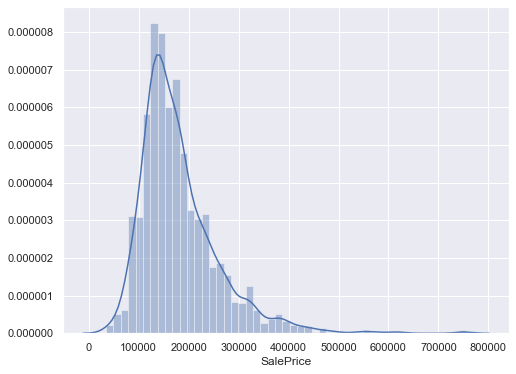

In [161]:
sns.distplot(data.SalePrice.dropna())

### 1.4.2 Check outliers.

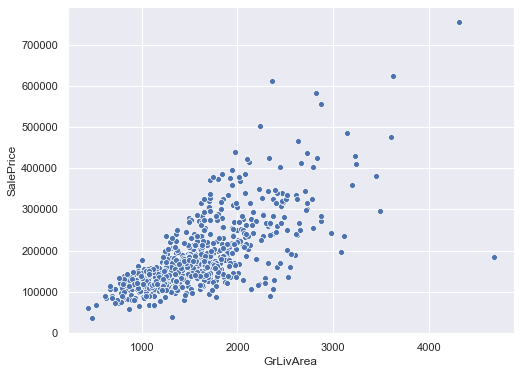

In [162]:
sns.scatterplot(data= data.dropna(), x= 'GrLivArea', y='SalePrice')

Houses with **GrLivArea** seems to be potential outliers, so would remove them.

In [176]:
data.drop(index= data.loc[(data.GrLivArea > 4000)&(data.SalePrice.notnull())].index, inplace= True)

At this point, we have cleaned our data, imputed missing values, and removed potential outliers. We would save our data to be used in the second phase, *Build*.

In [179]:
data.to_csv('modified_data.csv', index= True)